# <font color='#FFE15D'>**Week 9:  Data 🗃️**</font>

## **🔸 Imports**

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import  missingno as msno

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

## **🔸 Hello Data**

### Load dataset

In [142]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,NaN,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [143]:
df.shape

(1338, 7)

In [144]:
df.dtypes

age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

### Access to rows and columns

In [145]:
df.iloc[0:3, 2:4]
df.iloc[[0, 1337]]
df.iloc[:, [0]]

,age
0,19.0
1,NaN
2,28.0
3,33.0
4,32.0
...,...
1333,50.0
1334,18.0
1335,NaN
1336,21.0


In [146]:
df[['children', 'sex']]
df.children

0       0.0
1       1.0
2       3.0
3       0.0
4       0.0
       ... 
1333    3.0
1334    0.0
1335    0.0
1336    0.0
1337    0.0
Name: children, Length: 1338, dtype: float64

### Make a codable dataset

In [147]:
df.columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,NaN,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,NaN,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


### Examining categorical and numerical features

In [148]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1318 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1284 non-null   float64
 3   children  1205 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

In [149]:
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age          float64
sex         category
bmi          float64
children     float64
smoker      category
region      category
charges      float64
dtype: object

## **🔸 Missing Values**

In [150]:
df.info()
df.isna().sum()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1318 non-null   float64 
 1   sex       1338 non-null   category
 2   bmi       1284 non-null   float64 
 3   children  1205 non-null   float64 
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(4)
memory usage: 46.3 KB


age          20
sex           0
bmi          54
children    133
smoker        0
region        0
charges       0
dtype: int64

<AxesSubplot: >

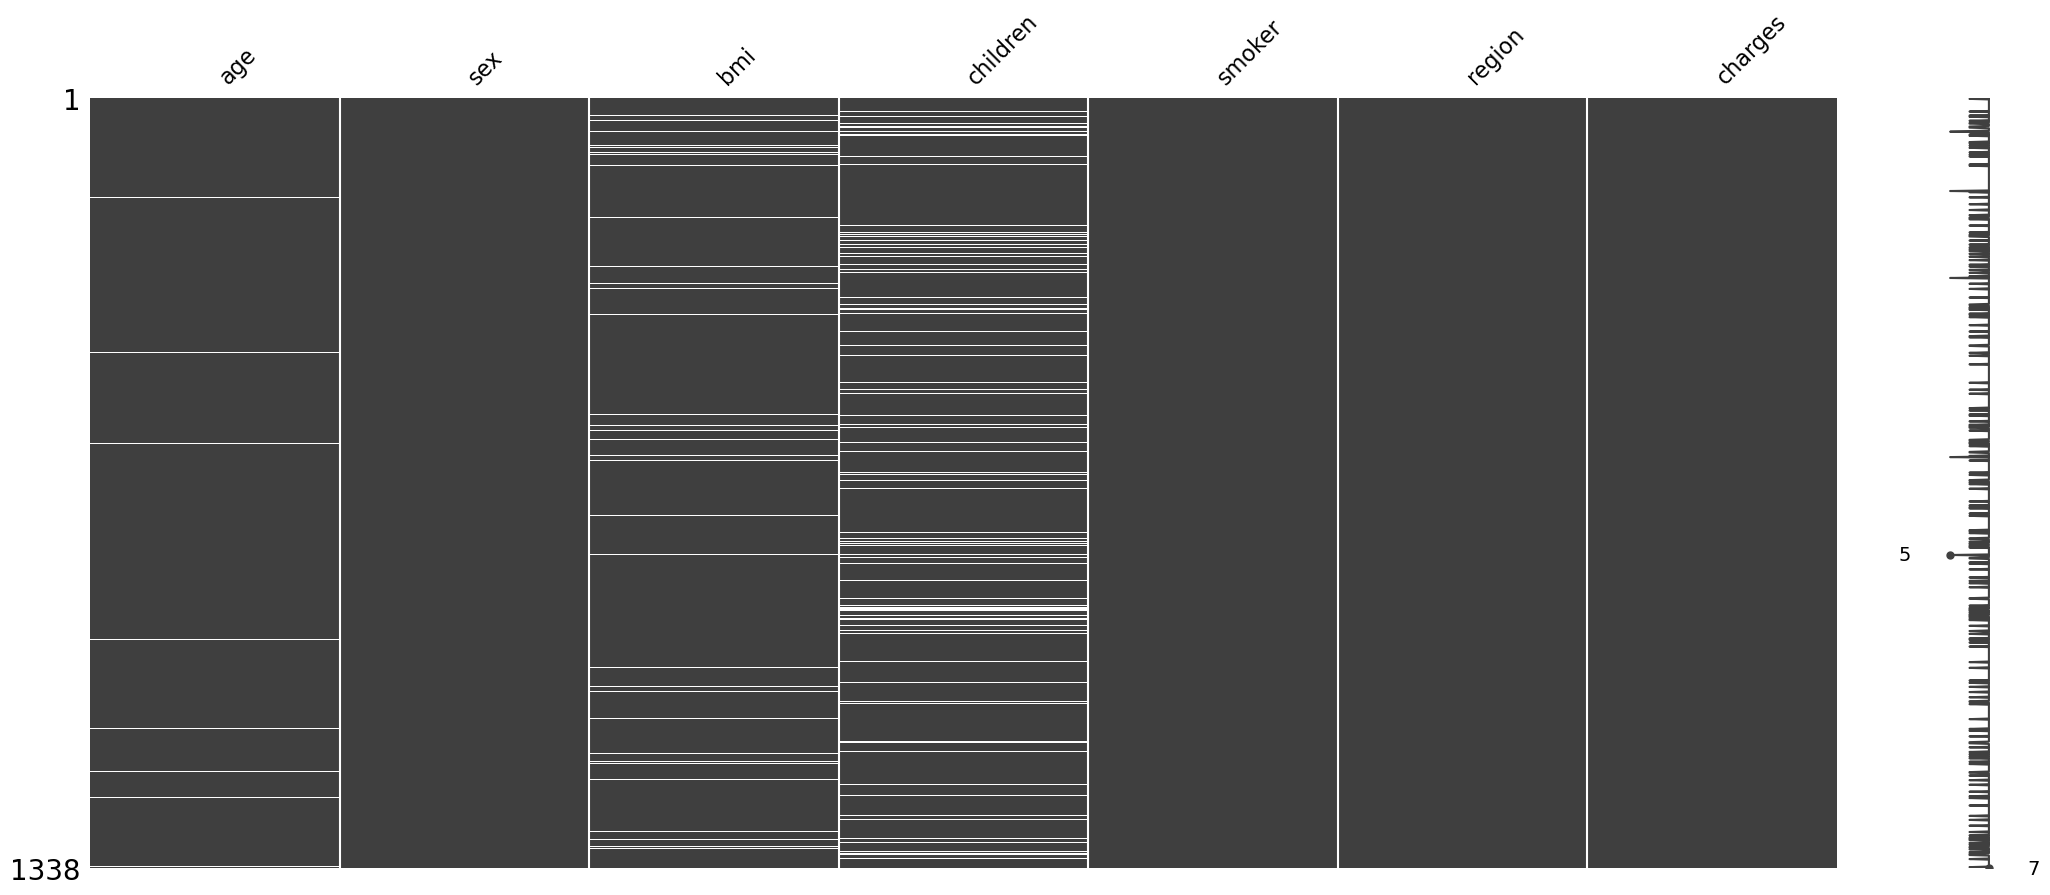

In [151]:
msno.matrix(df)

### Diagnose missing values

#### * Children

(array([180., 129.,  94., 114.,  97., 119., 128., 105., 117., 102.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

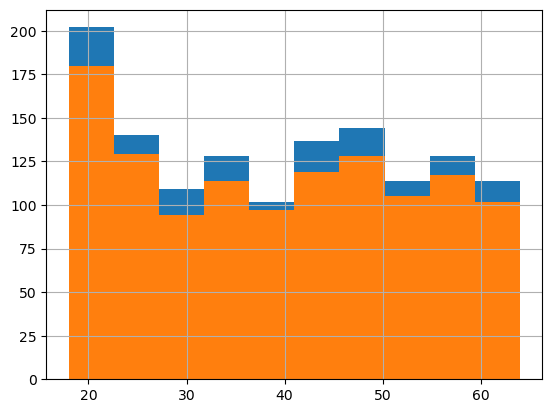

In [152]:
plt.hist(df.age)

flags = df.children.isna()
df.age[~flags]
plt.hist(df.age[~flags])

(array([ 28., 115., 202., 281., 244., 164.,  80.,  26.,  12.,   2.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

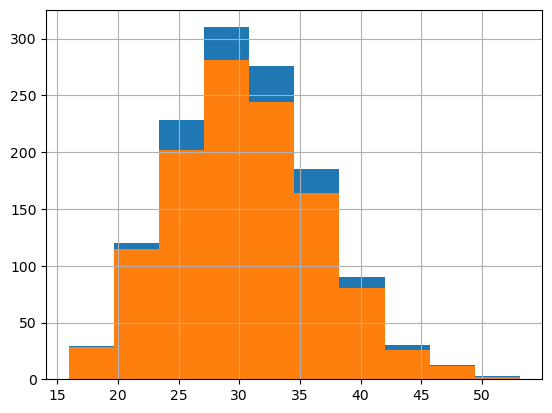

In [153]:
plt.hist(df.bmi)

flags = df.children.isna()
df.age[~flags]
plt.hist(df.bmi[~flags])

##### ** Function

In [154]:
def diagnose_mv(df, mv_column):
    cols = df.columns
    flags = df[mv_column].isna()
    fig, ax = plt.subplots(len(cols), 3, 
                           figsize=(len(cols)+3, len(cols)+3), 
                           constrained_layout=True)
    plt.rcParams['axes.grid'] = True
    for i, col in enumerate(cols):
        n1, bins, _ = ax[i, 0].hist(df[col])
        ax[i, 0].set_title(f'{col} with MV')
        #
        n2, _, _ = ax[i, 1].hist(df[col][~flags], bins=bins)
        ax[i, 1].set_title(f'{col} without MV')
        #
        if col == 'charges':
            bins/= 1e4 
        ax[i, 2].bar(bins[:-1], np.abs(n2-n1))
        ax[i, 2].set_title(f'Difference')
        

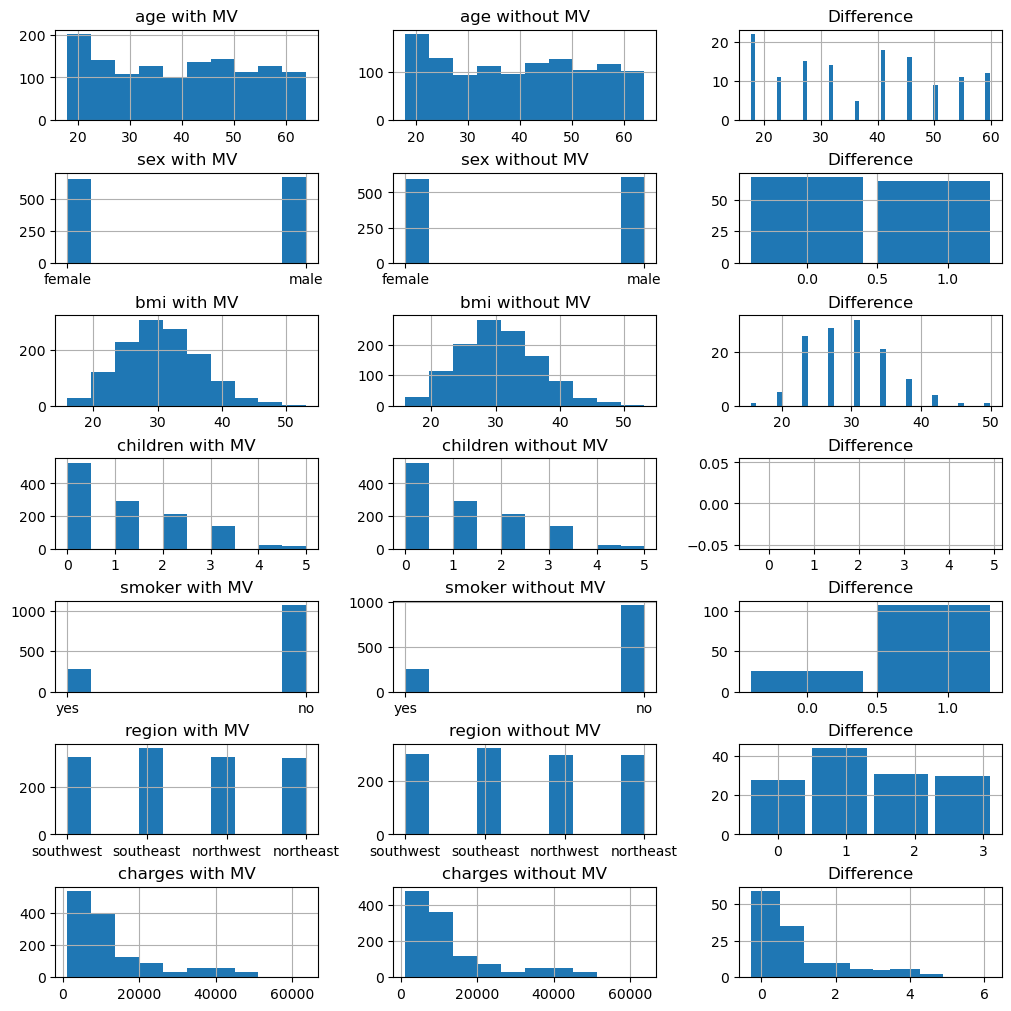

In [155]:
diagnose_mv(df, 'children')

#### * BMI

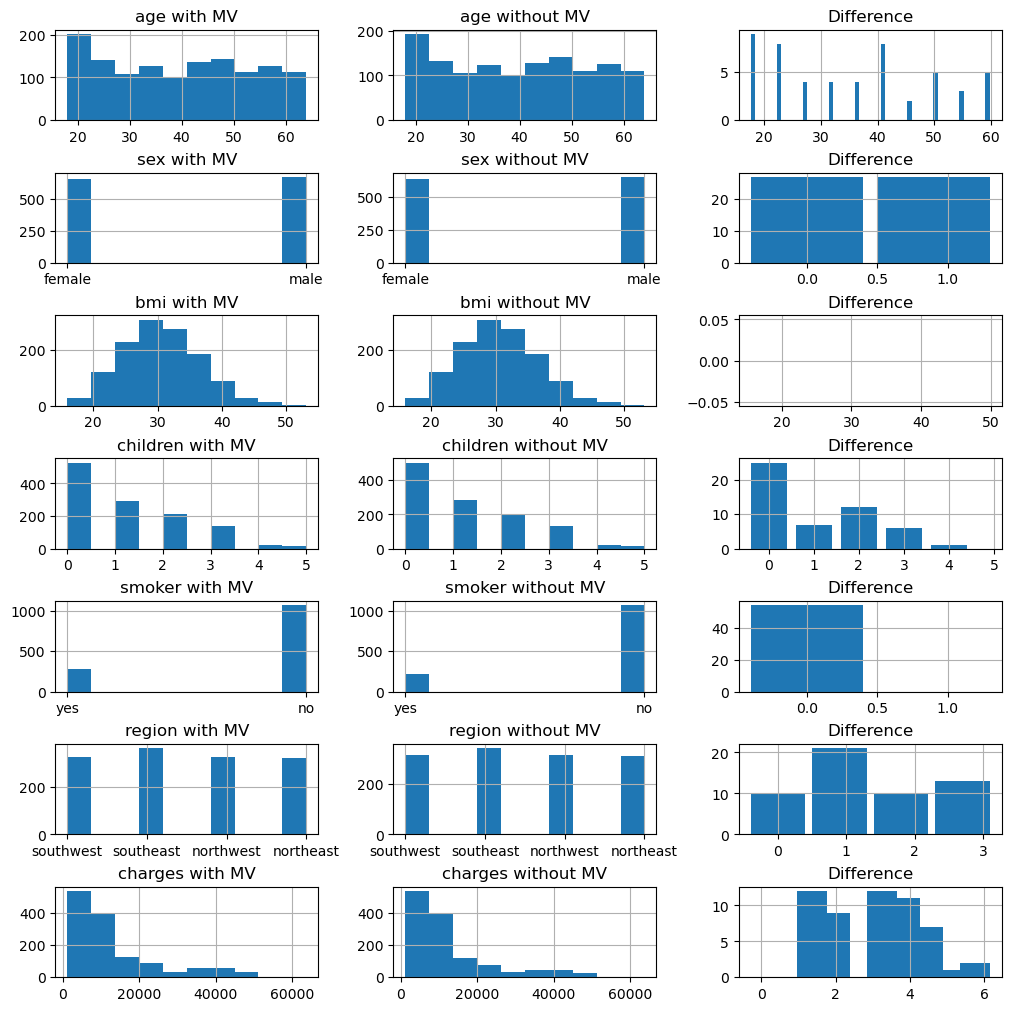

In [156]:
diagnose_mv(df, 'bmi')

#### * Age

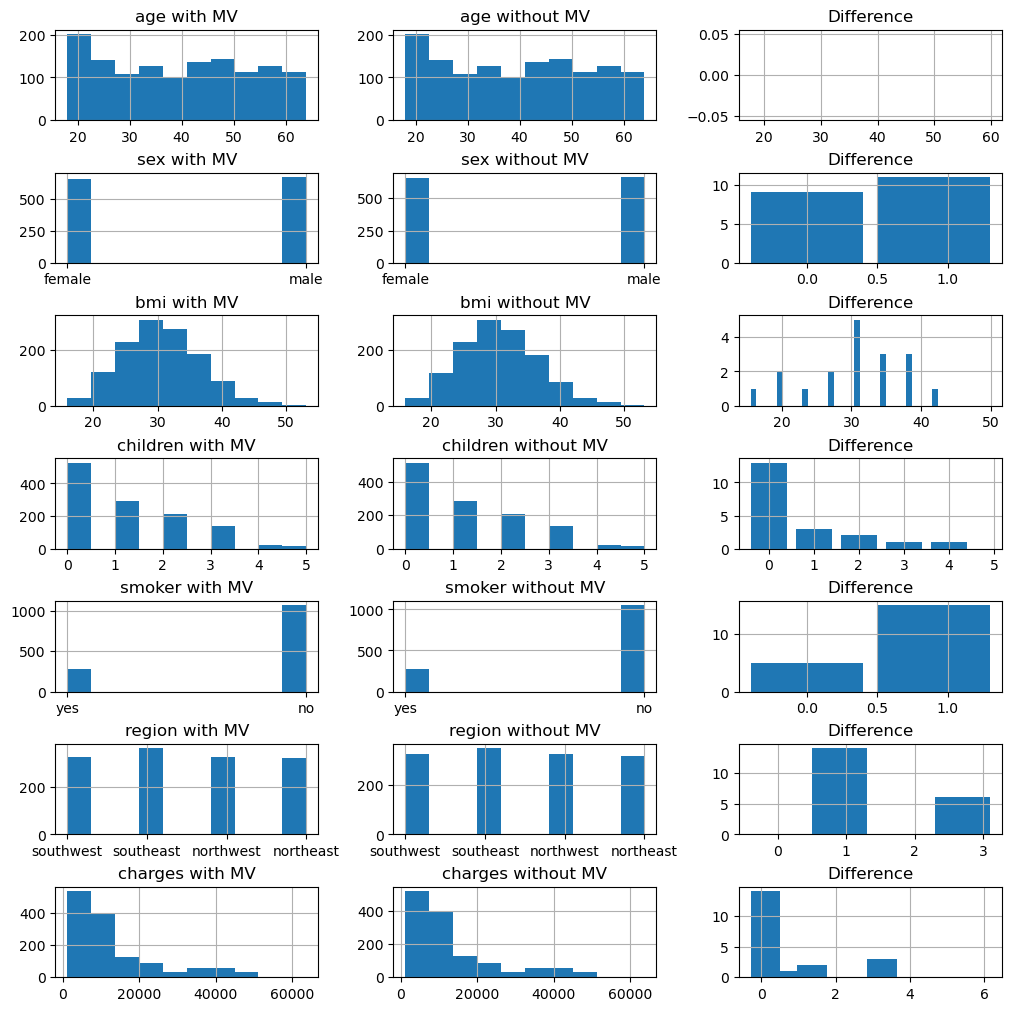

In [157]:
diagnose_mv(df, 'age')

### Handling missing values

#### * Children

<AxesSubplot: >

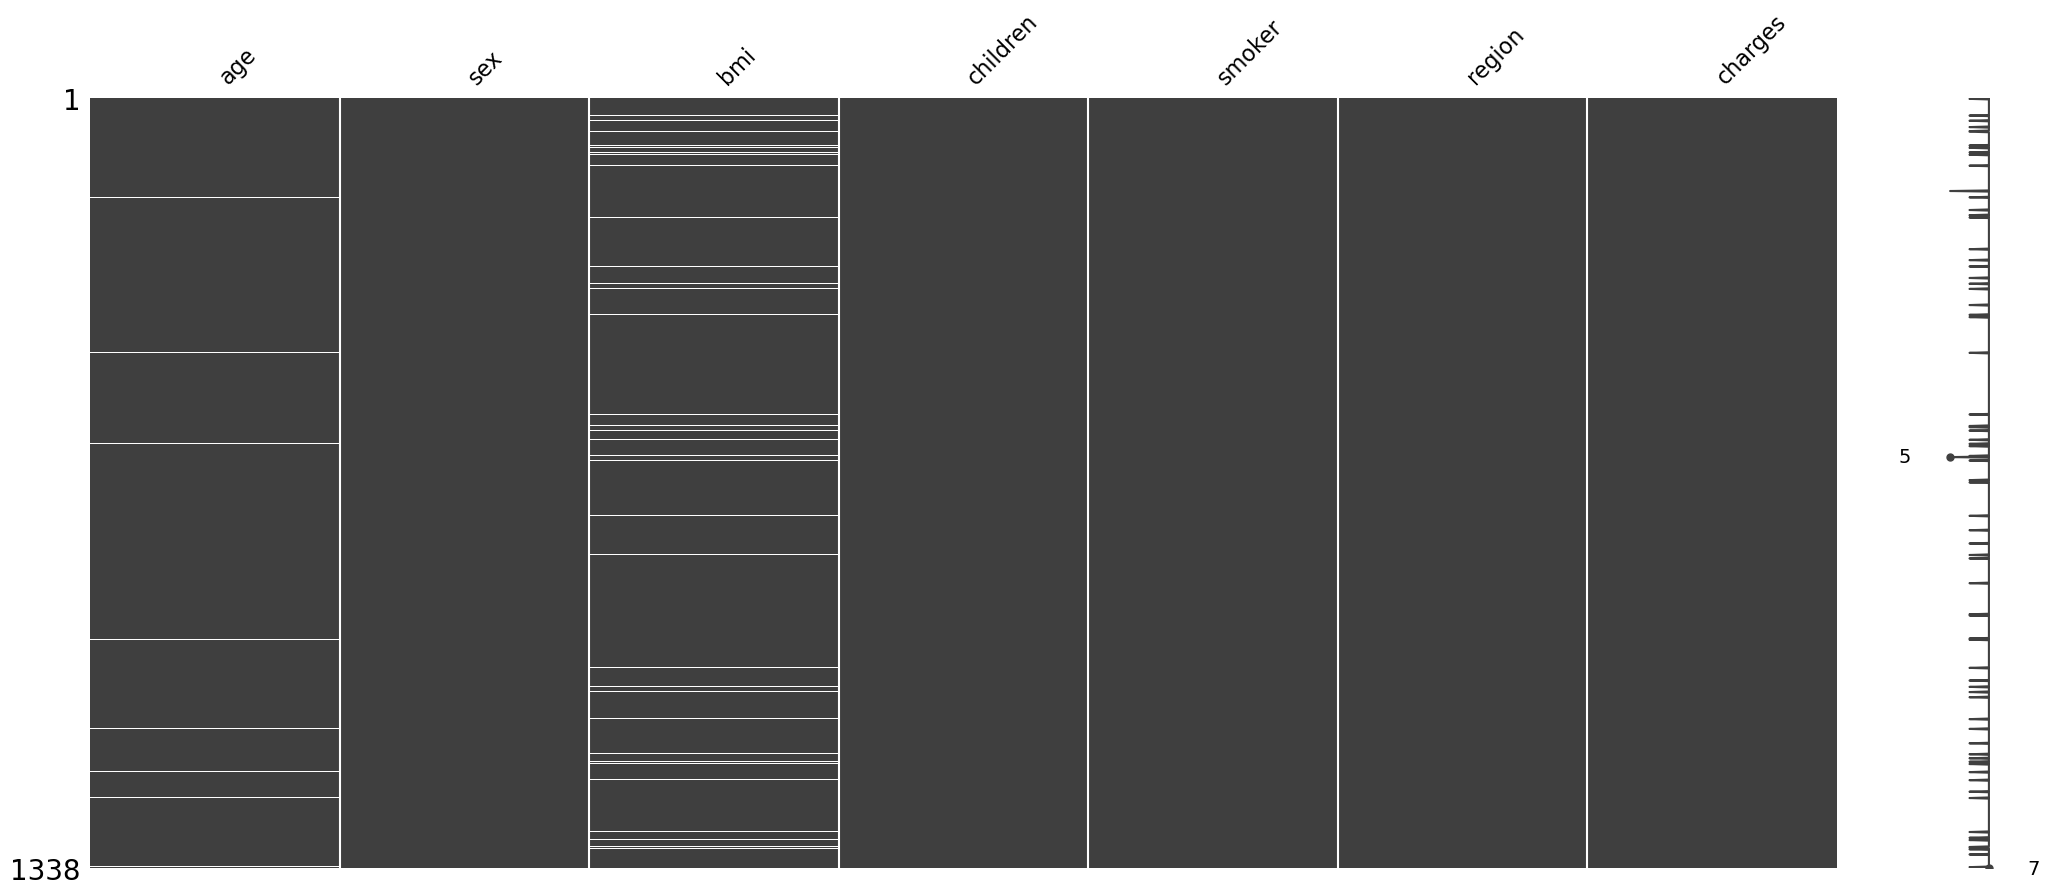

In [158]:
m = df.children.mode()[0]
df.children.fillna(m, inplace=True)
df.children.isna().sum()
msno.matrix(df)

#### * BMI

<AxesSubplot: >

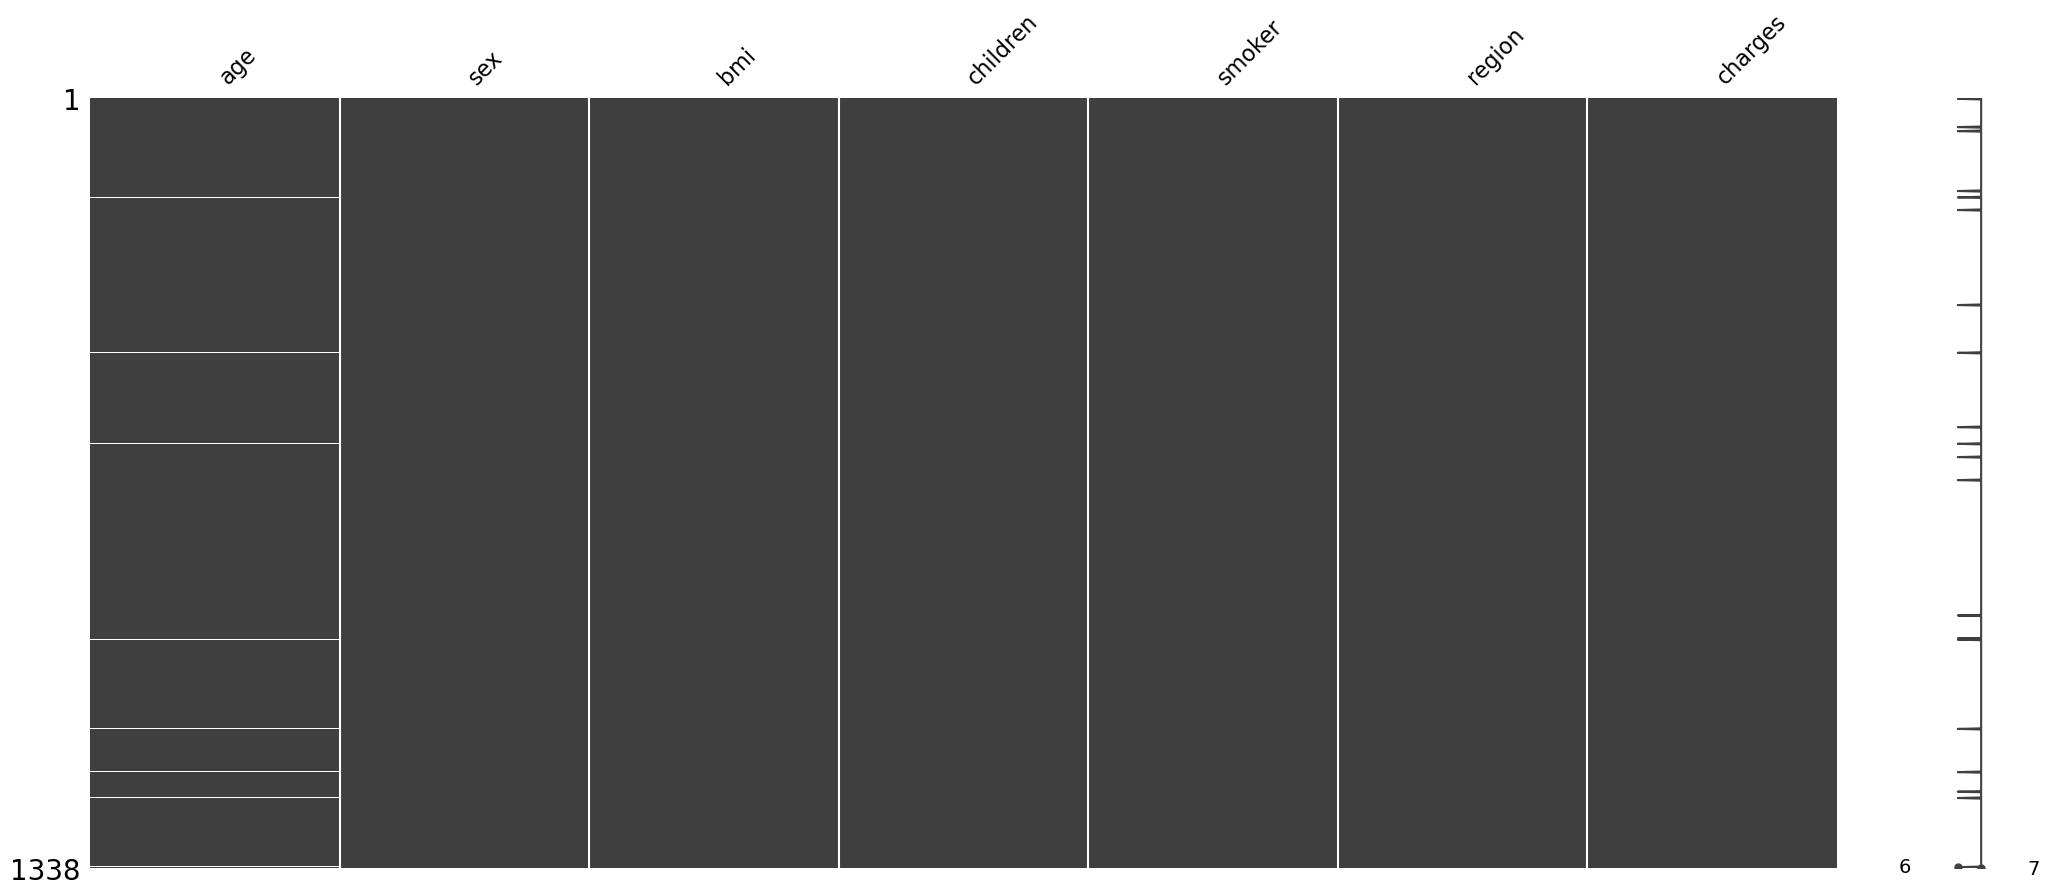

In [159]:
flags = df.smoker == 'yes'
m = df.bmi[flags].median()
df.bmi.fillna(m, inplace=True)
msno.matrix(df)

#### * Age

<AxesSubplot: >

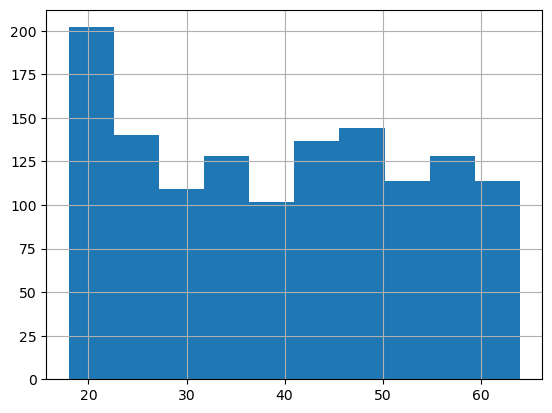

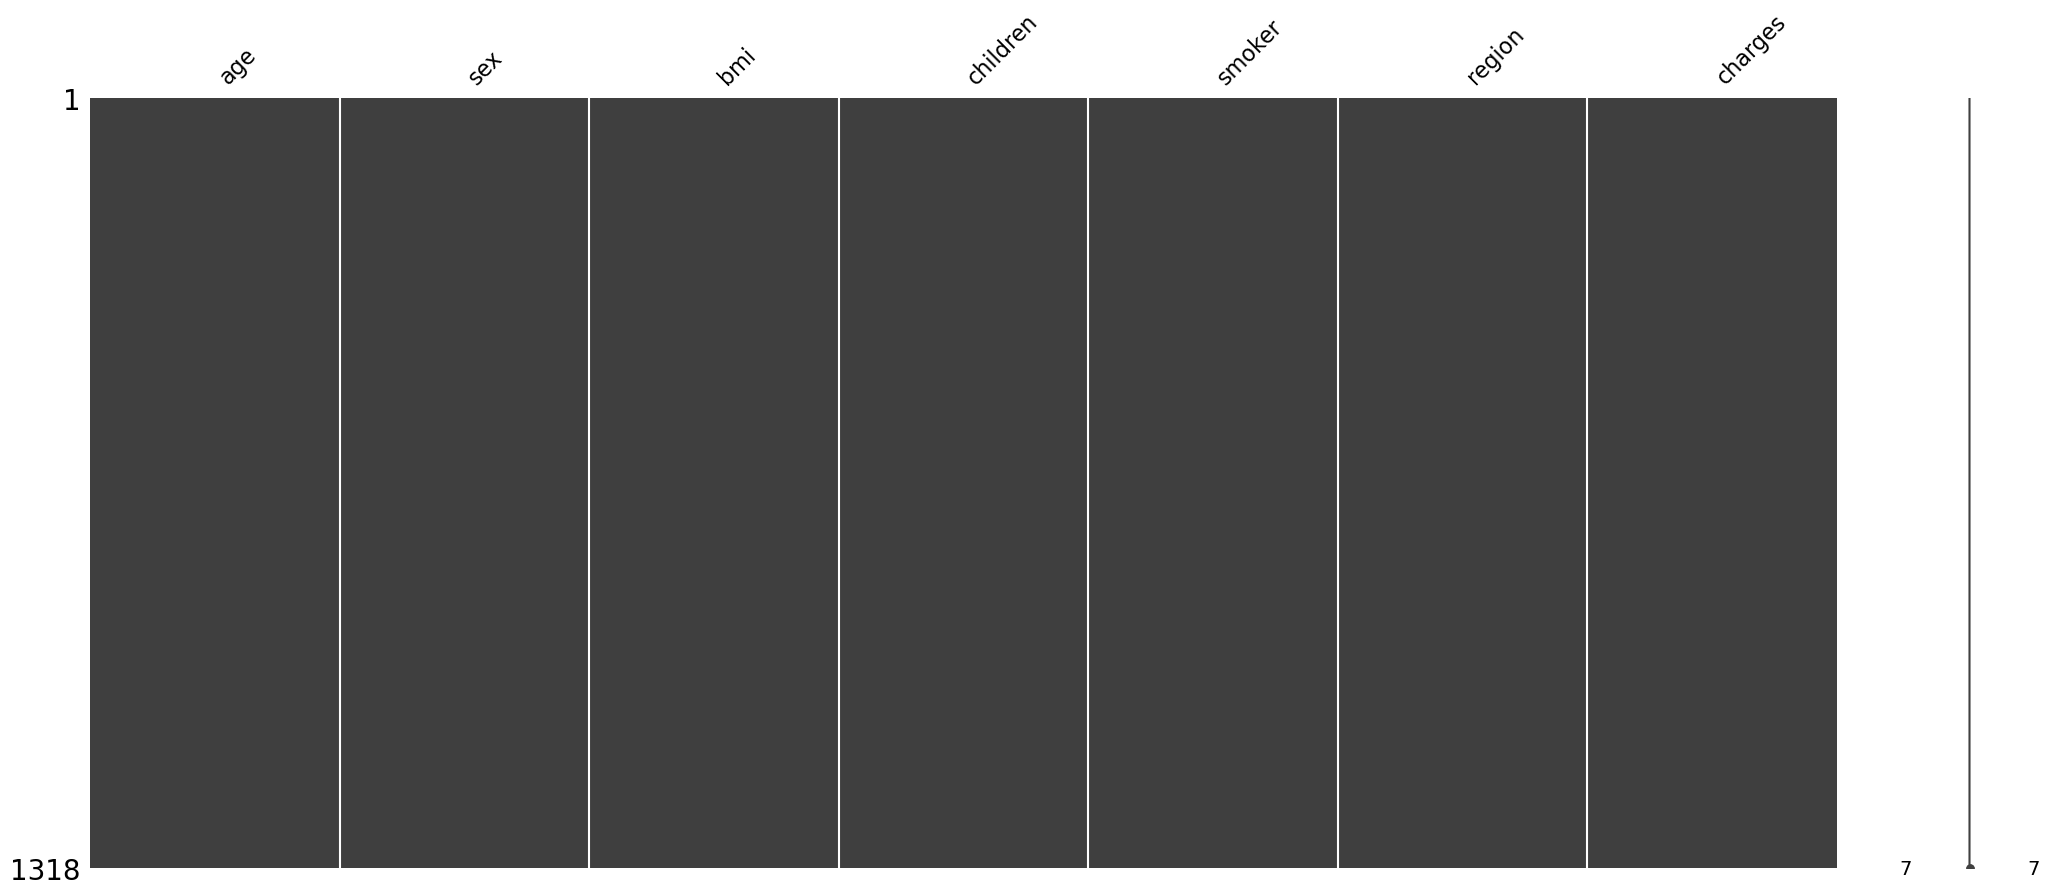

In [160]:
plt.hist(df.age)
flags = df.age.isna()
df.dropna(subset='age', inplace=True)
msno.matrix(df)

## **🔸 Encoding Categorical Features**

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1318 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1318 non-null   float64 
 1   sex       1318 non-null   category
 2   bmi       1318 non-null   float64 
 3   children  1318 non-null   float64 
 4   smoker    1318 non-null   category
 5   region    1318 non-null   category
 6   charges   1318 non-null   float64 
dtypes: category(3), float64(4)
memory usage: 55.8 KB


In [162]:
df.select_dtypes(include='float64')

,age,bmi,children,charges
0,19.0,27.900,0.0,16884.92400
2,28.0,33.000,3.0,4449.46200
3,33.0,22.705,0.0,21984.47061
4,32.0,28.880,0.0,3866.85520
5,31.0,25.740,0.0,3756.62160
...,...,...,...,...
1332,52.0,44.700,3.0,11411.68500
1333,50.0,30.970,3.0,10600.54830
1334,18.0,31.920,0.0,2205.98080
1336,21.0,25.800,0.0,2007.94500


In [163]:
pd.get_dummies(df, drop_first=True, dtype=np.float64)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,0.0,1.0,0.0,0.0,1.0
2,28.0,33.000,3.0,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,3866.85520,1.0,0.0,1.0,0.0,0.0
5,31.0,25.740,0.0,3756.62160,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1332,52.0,44.700,3.0,11411.68500,0.0,0.0,0.0,0.0,1.0
1333,50.0,30.970,3.0,10600.54830,1.0,0.0,1.0,0.0,0.0
1334,18.0,31.920,0.0,2205.98080,0.0,0.0,0.0,0.0,0.0
1336,21.0,25.800,0.0,2007.94500,0.0,0.0,0.0,0.0,1.0


### Label encoding

In [164]:
dfe = pd.get_dummies(df, columns=['sex', 'smoker'], drop_first=True, dtype=np.float64)
dfe

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19.0,27.900,0.0,southwest,16884.92400,0.0,1.0
2,28.0,33.000,3.0,southeast,4449.46200,1.0,0.0
3,33.0,22.705,0.0,northwest,21984.47061,1.0,0.0
4,32.0,28.880,0.0,northwest,3866.85520,1.0,0.0
5,31.0,25.740,0.0,southeast,3756.62160,0.0,0.0
...,...,...,...,...,...,...,...
1332,52.0,44.700,3.0,southwest,11411.68500,0.0,0.0
1333,50.0,30.970,3.0,northwest,10600.54830,1.0,0.0
1334,18.0,31.920,0.0,northeast,2205.98080,0.0,0.0
1336,21.0,25.800,0.0,southwest,2007.94500,0.0,0.0


### One-hot encoding

In [165]:
dfe = pd.get_dummies(dfe, columns=['region'], dtype=np.float64)
dfe

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,0.0,1.0,0.0,0.0,0.0,1.0
2,28.0,33.000,3.0,4449.46200,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,21984.47061,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,3866.85520,1.0,0.0,0.0,1.0,0.0,0.0
5,31.0,25.740,0.0,3756.62160,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1332,52.0,44.700,3.0,11411.68500,0.0,0.0,0.0,0.0,0.0,1.0
1333,50.0,30.970,3.0,10600.54830,1.0,0.0,0.0,1.0,0.0,0.0
1334,18.0,31.920,0.0,2205.98080,0.0,0.0,1.0,0.0,0.0,0.0
1336,21.0,25.800,0.0,2007.94500,0.0,0.0,0.0,0.0,0.0,1.0


In [166]:
dfe.columns
dfe = dfe[['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'charges']]
dfe

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19.0,27.900,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16884.92400
2,28.0,33.000,3.0,1.0,0.0,0.0,0.0,1.0,0.0,4449.46200
3,33.0,22.705,0.0,1.0,0.0,0.0,1.0,0.0,0.0,21984.47061
4,32.0,28.880,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3866.85520
5,31.0,25.740,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3756.62160
...,...,...,...,...,...,...,...,...,...,...
1332,52.0,44.700,3.0,0.0,0.0,0.0,0.0,0.0,1.0,11411.68500
1333,50.0,30.970,3.0,1.0,0.0,0.0,1.0,0.0,0.0,10600.54830
1334,18.0,31.920,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2205.98080
1336,21.0,25.800,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2007.94500


### Scikit-learn

In [167]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()

dfc = df.copy()

for col in dfc.select_dtypes(include='category').columns:
    dfc[col] = label_encoder.fit_transform(dfc[col])
    print(label_encoder.classes_)
dfc

['female' 'male']
['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']


,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0.0,1,3,16884.92400
2,28.0,1,33.000,3.0,0,2,4449.46200
3,33.0,1,22.705,0.0,0,1,21984.47061
4,32.0,1,28.880,0.0,0,1,3866.85520
5,31.0,0,25.740,0.0,0,2,3756.62160
...,...,...,...,...,...,...,...
1332,52.0,0,44.700,3.0,0,3,11411.68500
1333,50.0,1,30.970,3.0,0,1,10600.54830
1334,18.0,0,31.920,0.0,0,0,2205.98080
1336,21.0,0,25.800,0.0,0,3,2007.94500


In [168]:
dfc.rename(columns={'sex':'sex_male', 'smoker':'smoker_yes'}, inplace=True)
dfc

,age,sex_male,bmi,children,smoker_yes,region,charges
0,19.0,0,27.900,0.0,1,3,16884.92400
2,28.0,1,33.000,3.0,0,2,4449.46200
3,33.0,1,22.705,0.0,0,1,21984.47061
4,32.0,1,28.880,0.0,0,1,3866.85520
5,31.0,0,25.740,0.0,0,2,3756.62160
...,...,...,...,...,...,...,...
1332,52.0,0,44.700,3.0,0,3,11411.68500
1333,50.0,1,30.970,3.0,0,1,10600.54830
1334,18.0,0,31.920,0.0,0,0,2205.98080
1336,21.0,0,25.800,0.0,0,3,2007.94500


## **🔸 Exploratory Data Analysis (EDA)**

### Single varaible analysis

#### * Central tendency

In [169]:
dfe.mean()
dfe.median()
dfe.mode()

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19.0,30.11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1639.5631


In [170]:
df.mean(numeric_only=True)

age            39.528832
bmi            30.589632
children        0.972686
charges     13335.884744
dtype: float64

#### * Variability

In [171]:
dfe.std()
dfe.var()

age                 1.934658e+02
bmi                 3.508108e+01
children            1.410035e+00
sex_male            2.501691e-01
smoker_yes          1.625648e-01
region_northeast    1.832002e-01
region_northwest    1.859223e-01
region_southeast    1.951831e-01
region_southwest    1.859223e-01
charges             1.463690e+08
dtype: float64

In [172]:
x = np.array([1, 2, 3, 4, 2, 2, 2])
np.mean(np.abs(x - x.mean()))

0.6938775510204082

In [173]:
def median_abs_dev(x):
    return (x - x.median()).abs().median()

median_abs_dev(dfe)

age                   12.00000
bmi                    3.98750
children               1.00000
sex_male               0.00000
smoker_yes             0.00000
region_northeast       0.00000
region_northwest       0.00000
region_southeast       0.00000
region_southwest       0.00000
charges             4986.33435
dtype: float64

In [174]:
dfe[['age']].apply(median_abs_dev)

age    12.0
dtype: float64

#### * Plots

(array([ 269.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1049.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

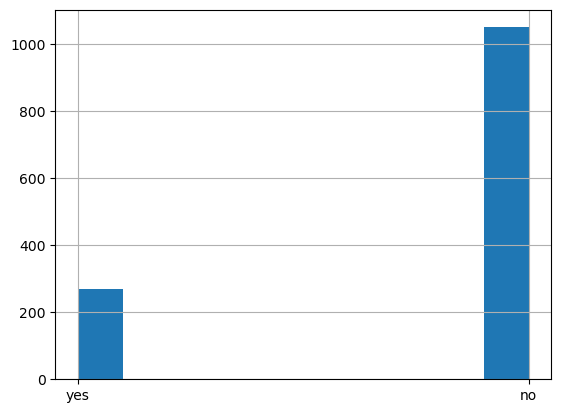

In [175]:
# plt.hist(dfe.age)
# plt.hist(df.sex)
plt.hist(df.smoker)

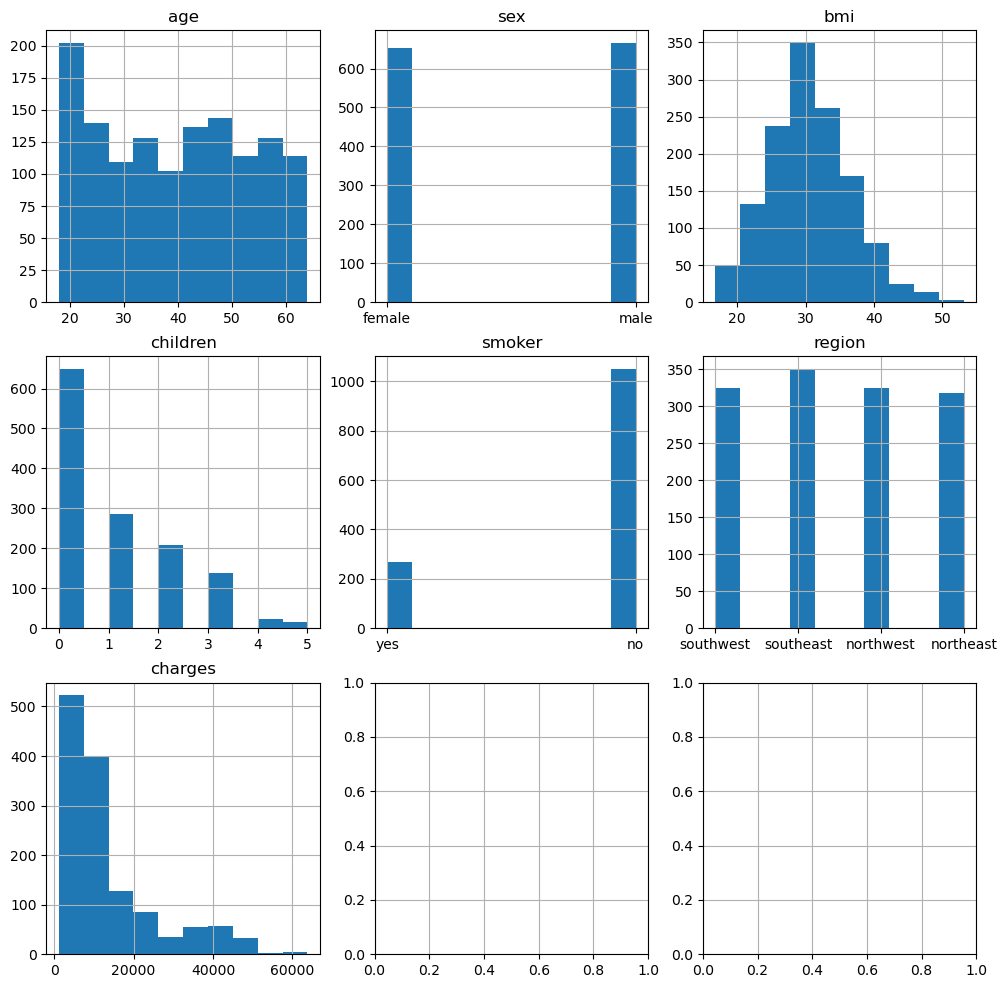

In [176]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes_flat = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes_flat[i]
    ax.hist(df[col])
    ax.set_title(col)

,age,bmi,children,charges
count,1318.000000,1318.000000,1318.000000,1318.000000
mean,39.528832,30.589632,0.972686,13335.884744
std,13.909197,5.922928,1.187449,12098.305244
min,18.000000,16.815000,0.000000,1131.506600
25%,27.000000,26.410000,0.000000,4828.586213
50%,40.000000,30.110000,1.000000,9423.922650
75%,51.000000,34.298750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


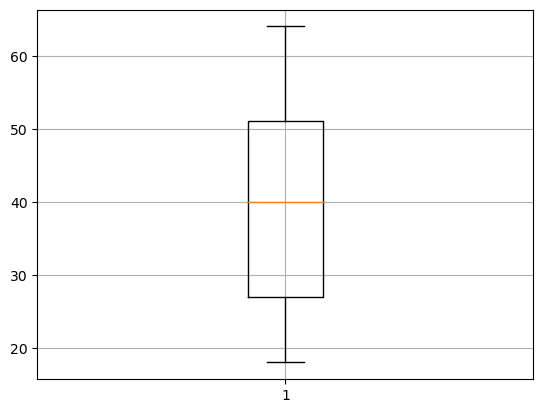

In [177]:
plt.boxplot(df.age);
df.describe()

{'whiskers': [<matplotlib.lines.Line2D at 0x170f419ad30>,
 'caps': [<matplotlib.lines.Line2D at 0x170ee8212b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x170f419a9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x170ee821760>],
 'fliers': [<matplotlib.lines.Line2D at 0x170ee821a00>],
 'means': []}

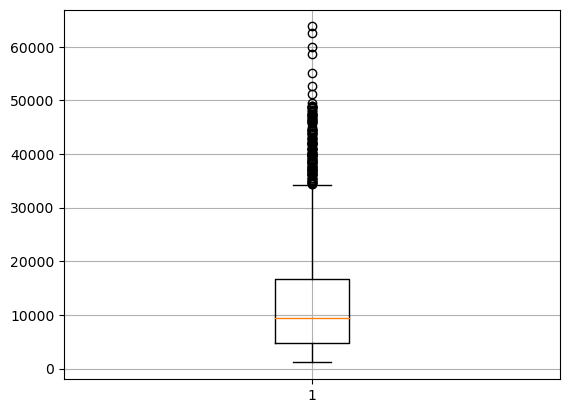

In [178]:
# plt.boxplot(df.bmi);
plt.boxplot(df.charges)

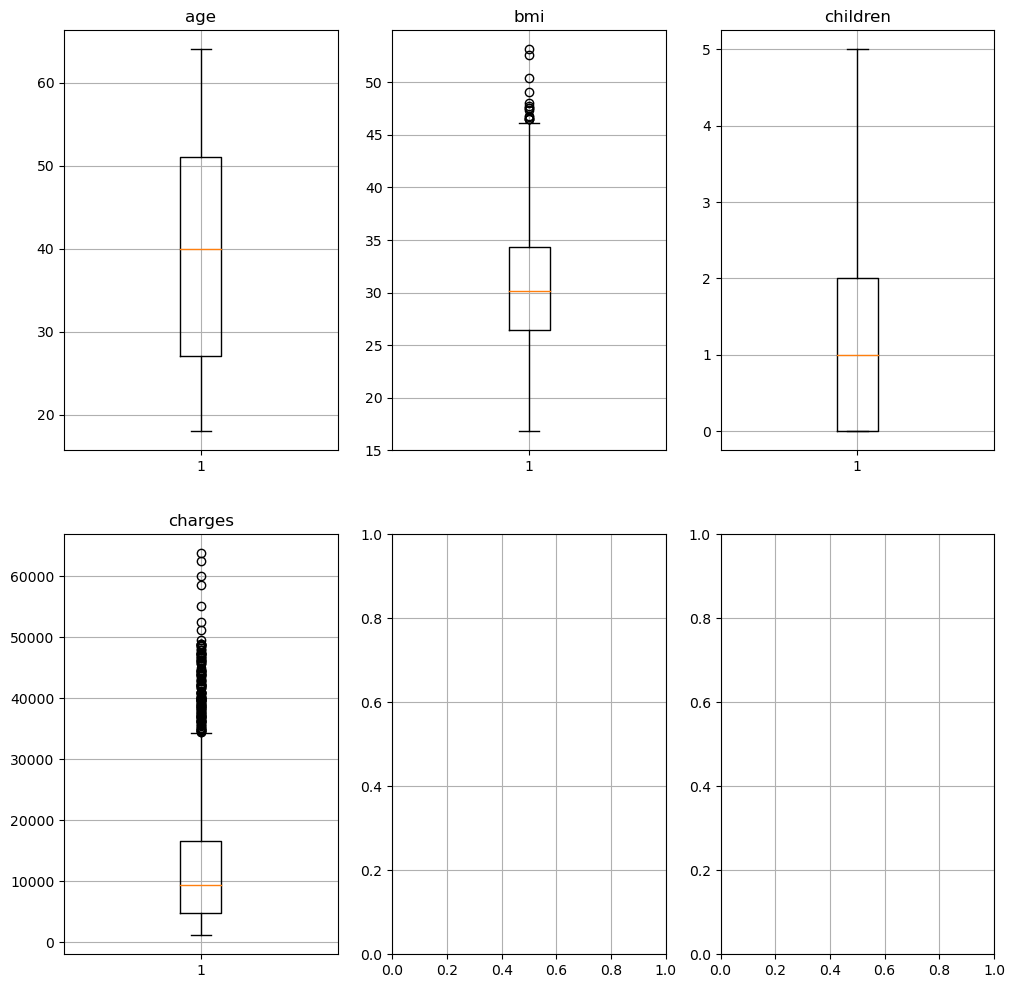

In [179]:
fig, axes = plt.subplots(2, 3, figsize=(12, 12))
axes_flat = axes.flatten()

for i, col in enumerate(df.select_dtypes('float64')):
        ax = axes_flat[i]
        ax.boxplot(df[col])
        ax.set_title(col)

### Two Varaibles Analysis

#### * Correlation

In [180]:
dfe.corr()

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
age,1.000000,0.125517,0.051261,-0.019283,-0.023052,0.005718,-0.013657,0.010739,-0.003022,0.298536
bmi,0.125517,1.000000,0.007090,0.045233,-0.010906,-0.120484,-0.139734,0.265563,-0.012764,0.158379
children,0.051261,0.007090,1.000000,0.019386,0.005309,-0.004951,0.022062,-0.022347,0.005750,0.066010
sex_male,-0.019283,0.045233,0.019386,1.000000,0.076340,-0.005134,-0.010490,0.018578,-0.003449,0.057362
smoker_yes,-0.023052,-0.010906,0.005309,0.076340,1.000000,0.000427,-0.036388,0.070615,-0.036388,0.786695
region_northeast,0.005718,-0.120484,-0.004951,-0.005134,0.000427,1.000000,-0.322612,-0.339086,-0.322612,0.004355
region_northwest,-0.013657,-0.139734,0.022062,-0.010490,-0.036388,-0.322612,1.000000,-0.344004,-0.327291,-0.043441
region_southeast,0.010739,0.265563,-0.022347,0.018578,0.070615,-0.339086,-0.344004,1.000000,-0.344004,0.083837
region_southwest,-0.003022,-0.012764,0.005750,-0.003449,-0.036388,-0.322612,-0.327291,-0.344004,1.000000,-0.046782
charges,0.298536,0.158379,0.066010,0.057362,0.786695,0.004355,-0.043441,0.083837,-0.046782,1.000000


<AxesSubplot: >

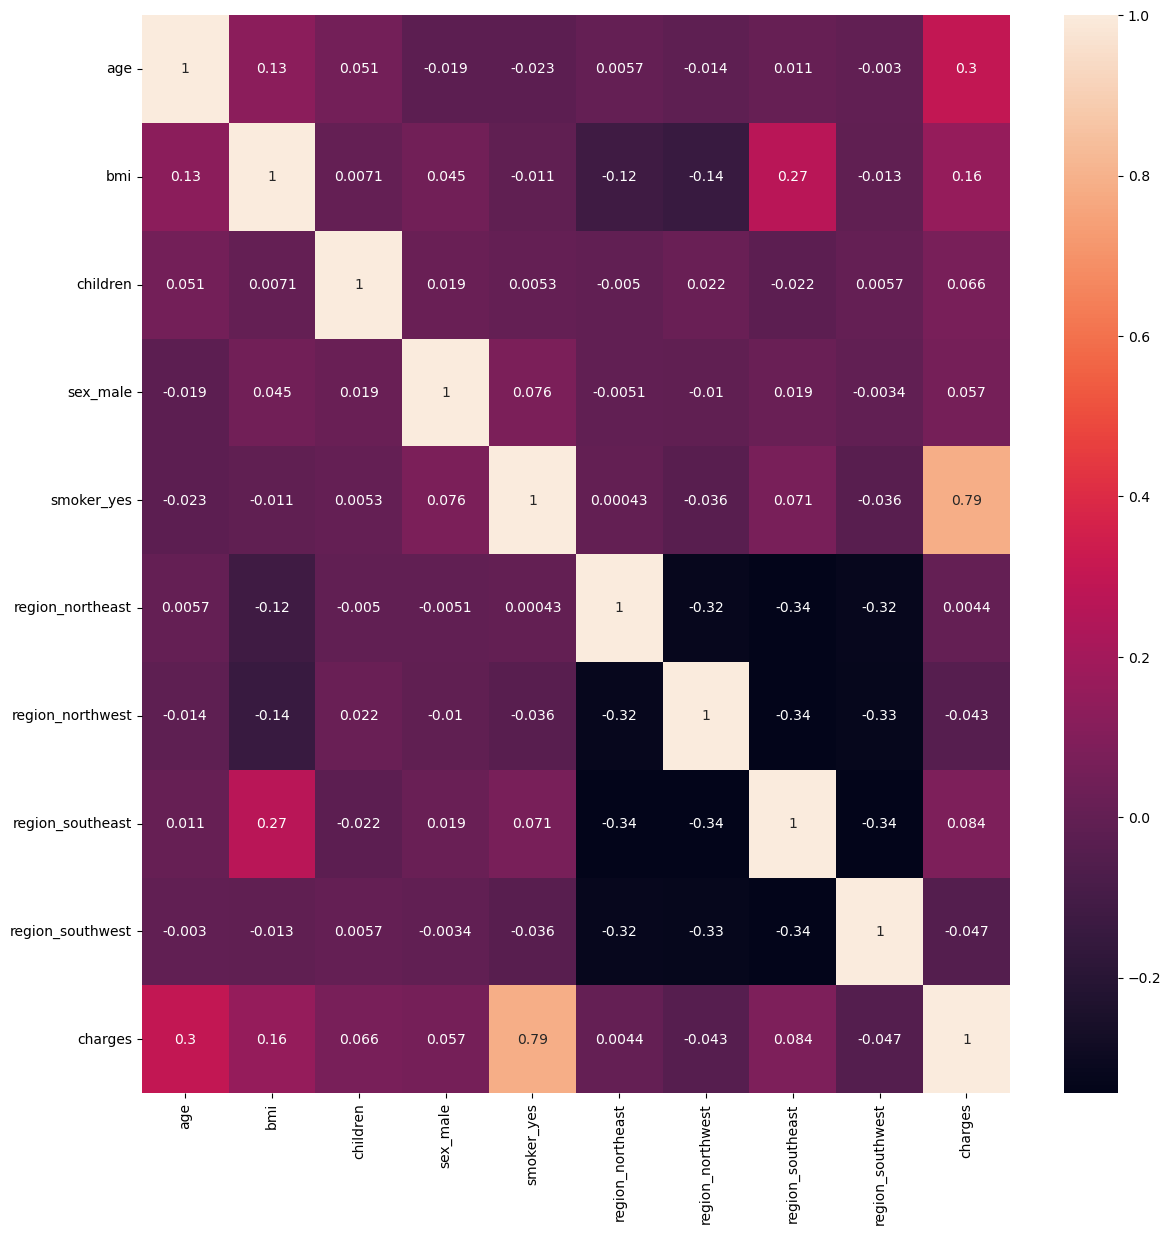

In [181]:
plt.figure(figsize=(14, 14))
sns.heatmap(dfe.corr(), annot=True)

#### * Plots

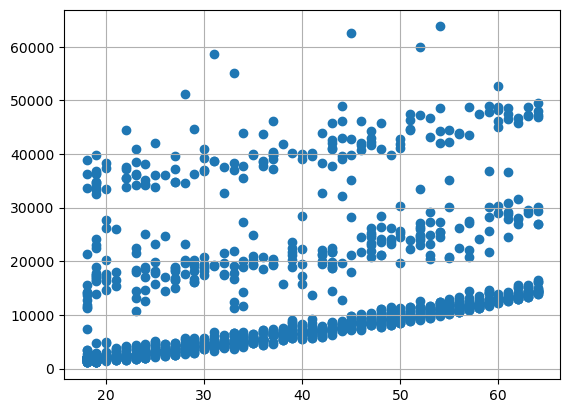

In [182]:
plt.scatter(df.age, df.charges)

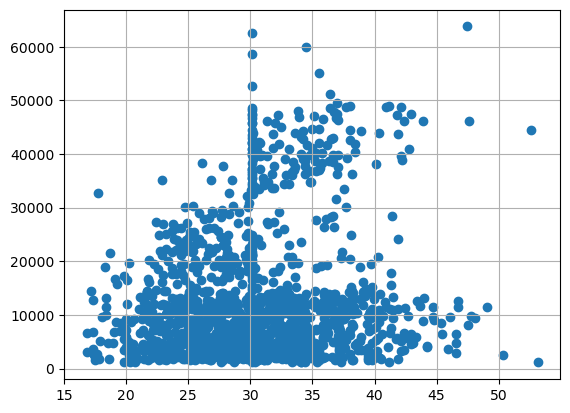

In [183]:
plt.scatter(df.bmi, df.charges)

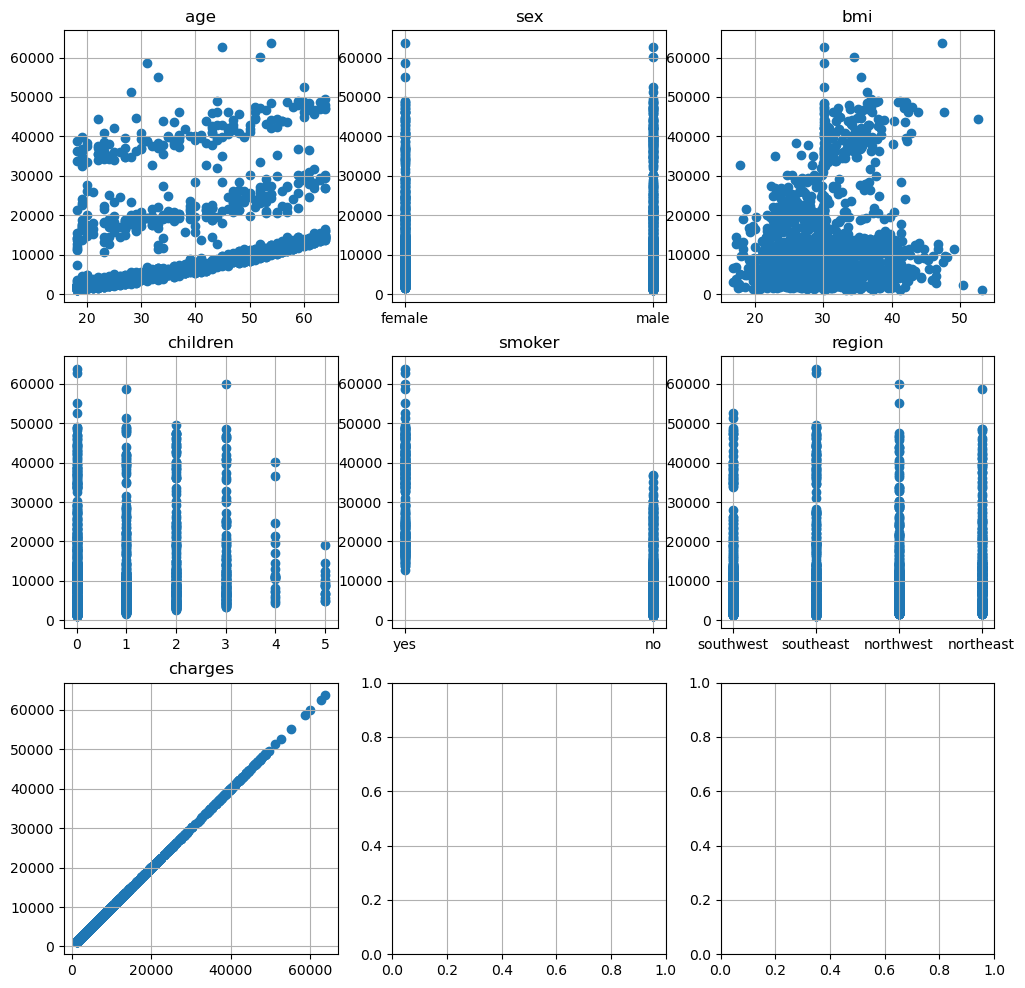

In [184]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes_flat = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes_flat[i]
    ax.scatter(df[col], df.charges)
    ax.set_title(col)

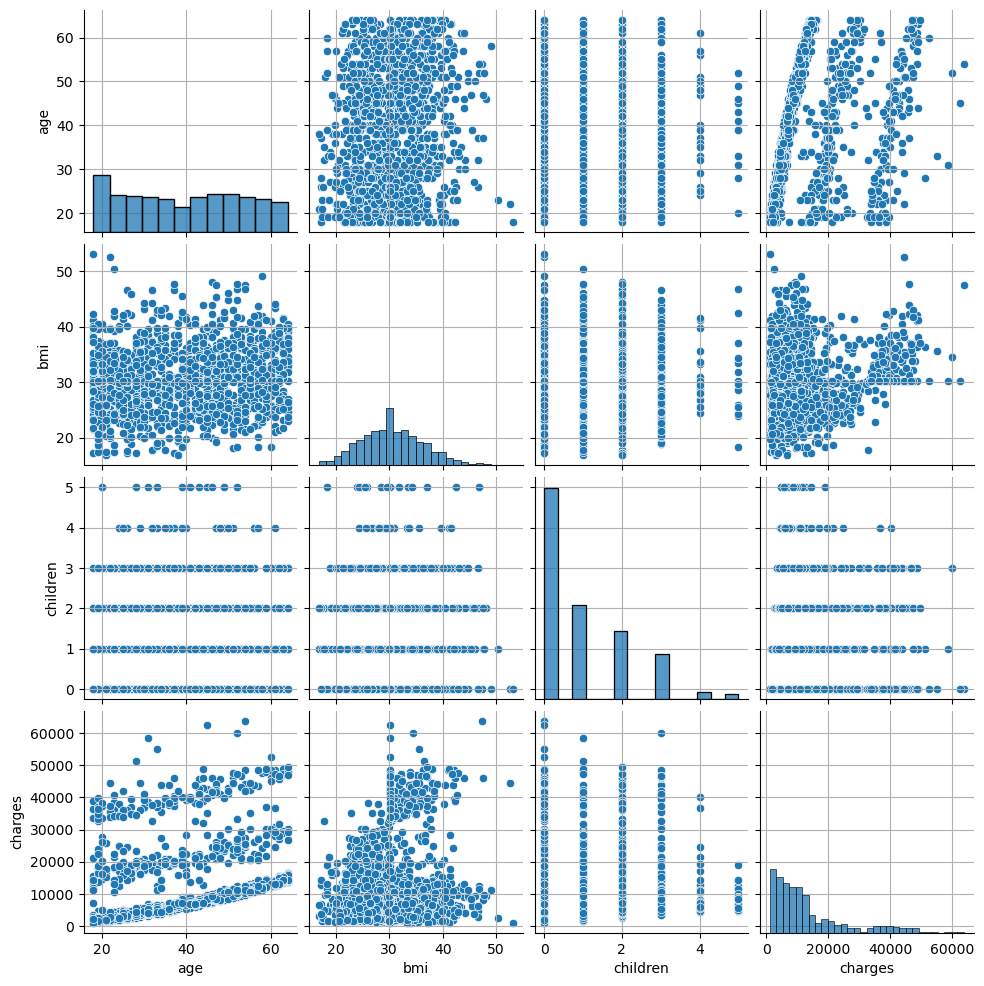

In [185]:
sns.pairplot(df)

In [186]:
pd.crosstab(index=df.sex, columns=df.smoker)

smoker,no,yes
sex,,
female,540,113
male,509,156


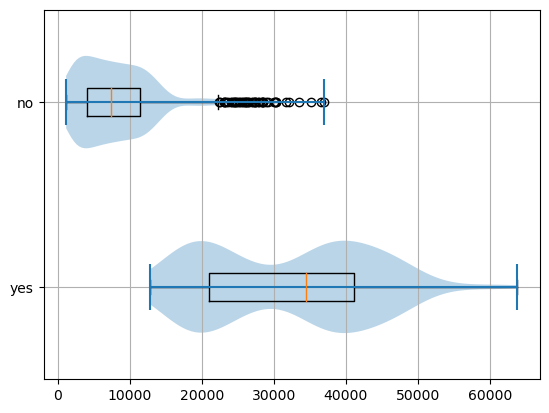

In [187]:
col = 'smoker'
plt.boxplot([df.charges[df[col] == var] for var in df[col].unique()], labels=df[col].unique(), vert=False);
plt.violinplot([df.charges[df[col] == var] for var in df[col].unique()], vert=False);

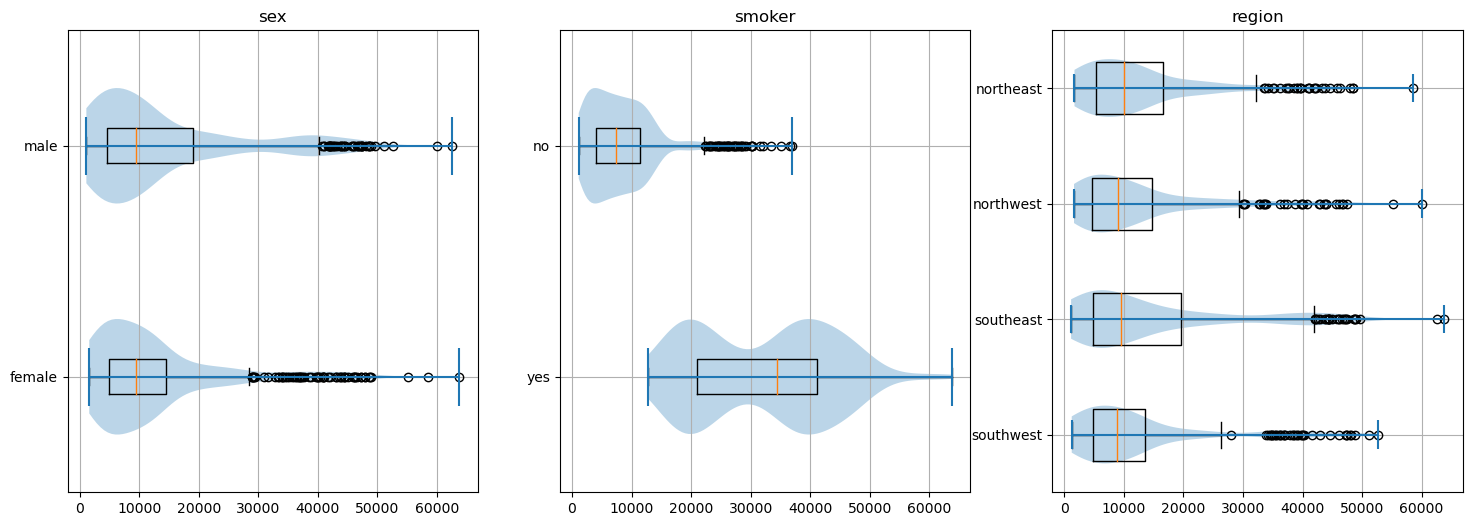

In [188]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes_flat = axes.flatten()

for i, col in enumerate(df.select_dtypes('category')):
    ax = axes_flat[i]
    ax.boxplot([df.charges[df[col] == var] for var in df[col].unique()], vert=False, labels=df[col].unique())
    ax.violinplot([df.charges[df[col] == var] for var in df[col].unique()], vert=False)
    ax.set_title(col)

### Multi Varaibles Analysis

#### * Smoker, BMI, Charges

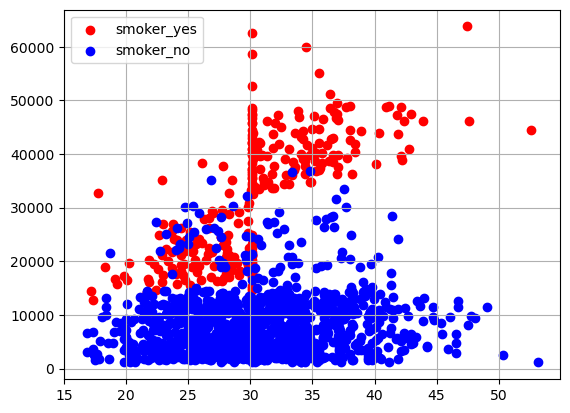

In [189]:
flags = df.smoker == 'yes'
plt.scatter(df.bmi[flags], df.charges[flags], c='r', label='smoker_yes')
plt.scatter(df.bmi[~flags], df.charges[~flags], c='b', label='smoker_no')
plt.legend()

#### * Smoker, Age, Charges

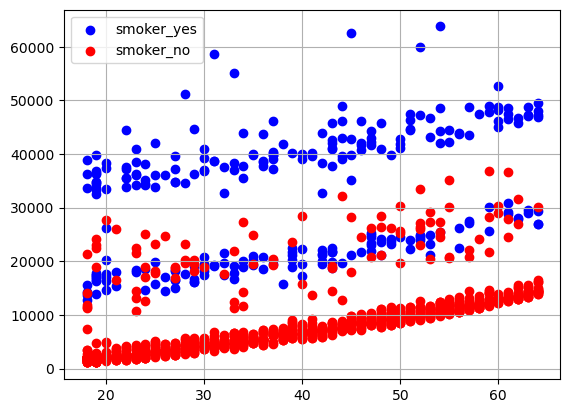

In [190]:
flags = df.smoker == 'yes'
plt.scatter(df.age[flags], df.charges[flags], c='b', label='smoker_yes')
plt.scatter(df.age[~flags], df.charges[~flags], c='r', label='smoker_no')
plt.legend()

#### * Smoker, BMI, Age, Charges

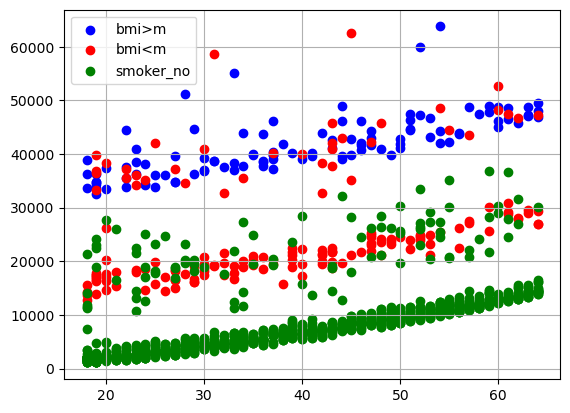

In [191]:
flags1 = df.smoker == 'yes'
flags2 = df.bmi > df.bmi.median()
plt.scatter(df.age[flags1 & flags2], df.charges[flags1 & flags2], c='b', label='bmi>m')
plt.scatter(df.age[flags1 & ~flags2], df.charges[flags1 & ~flags2], c='r', label='bmi<m')
plt.scatter(df.age[~flags1], df.charges[~flags1], c='g', label='smoker_no')
plt.legend()

## **🔸 Outliers**

### Univariate analysis

#### * Numerical features

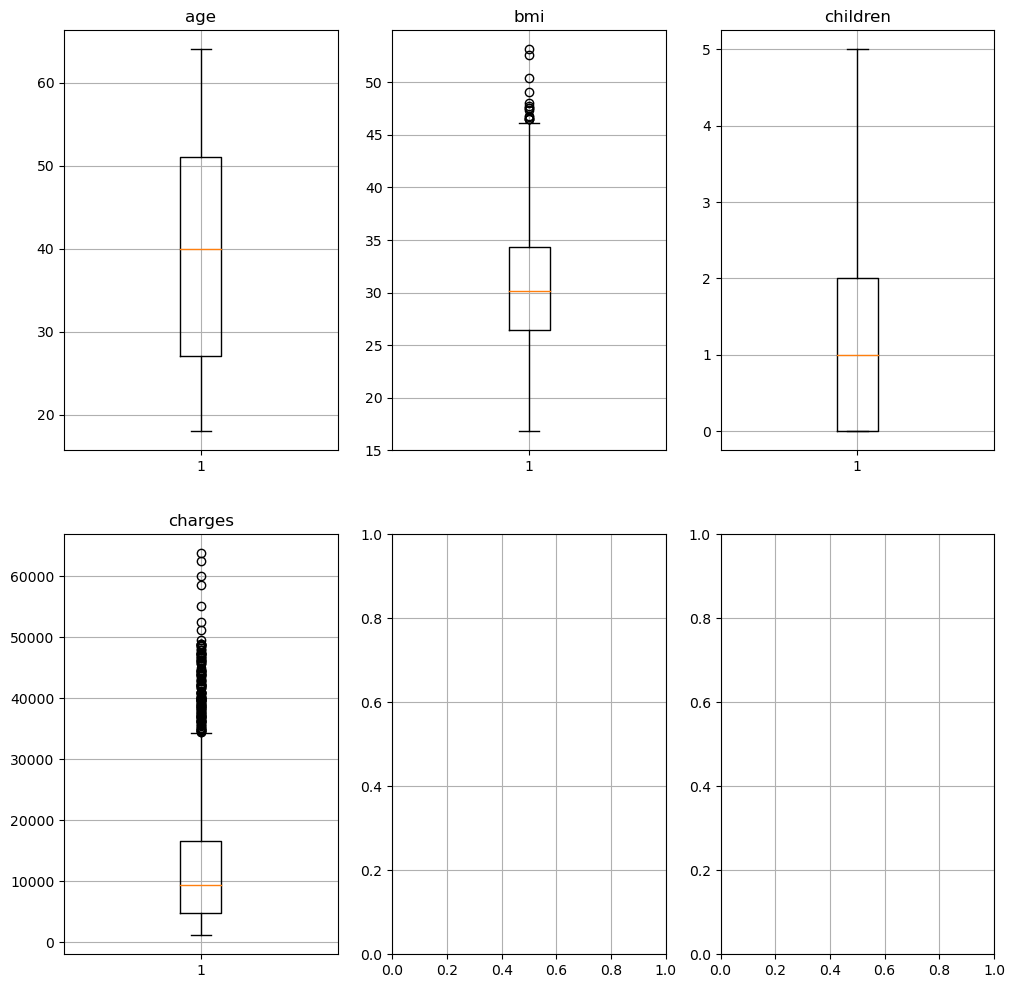

In [192]:
fig, axes = plt.subplots(2, 3, figsize=(12, 12))
axes_flat = axes.flatten()

for i, col in enumerate(df.select_dtypes('float64')):
        ax = axes_flat[i]
        ax.boxplot(df[col])
        ax.set_title(col)

26.41 34.29875 7.888749999999998 14.576875000000003 46.131874999999994


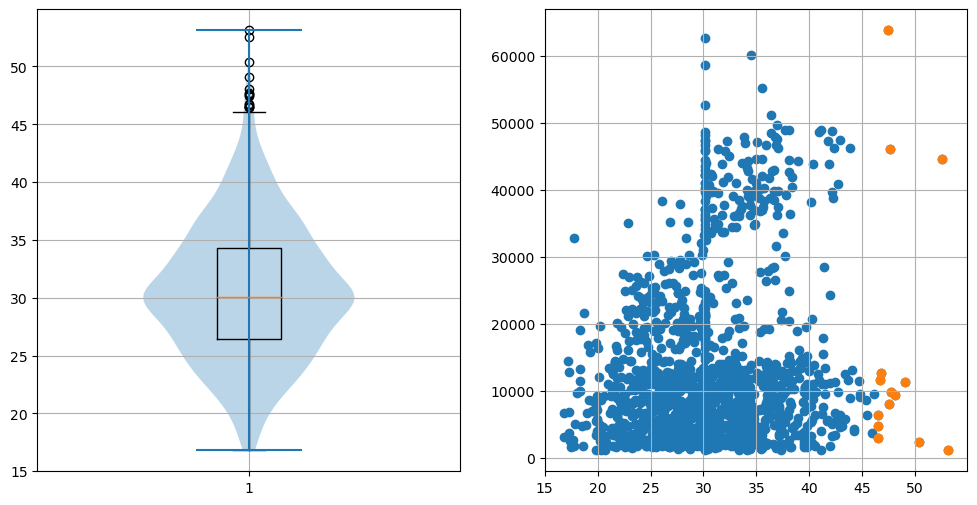

In [202]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].boxplot(df.bmi);
axes[0].violinplot(df.bmi)

axes[1].scatter(df.bmi, df.charges)

desc = df.describe()
Q1 = desc.loc['25%', 'bmi']
Q3 = desc.loc['75%', 'bmi']
IQR = Q3 - Q1
lower_cap = Q1 - 1.5*IQR
upper_cap = Q3 + 1.5*IQR
print(Q1, Q3, IQR, lower_cap, upper_cap)

flags = (df.bmi < lower_cap) | (df.bmi > upper_cap)
axes[1].scatter(df.bmi[flags], df.charges[flags])

#### * handling outliers

In [205]:
df.bmi[flags] = upper_cap

C:\Users\PC\AppData\Local\Temp\ipykernel_3636\1242968245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bmi[flags] = upper_cap


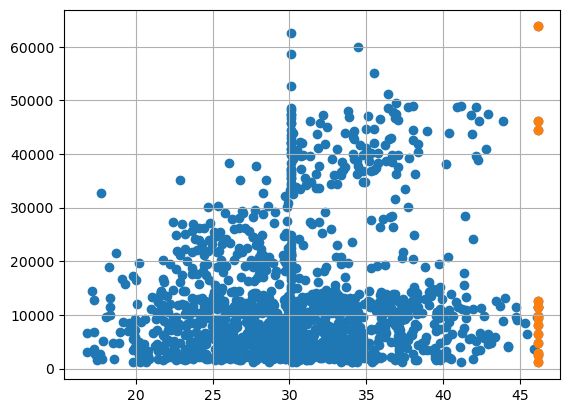

In [207]:
plt.scatter(df.bmi, df.charges)
plt.scatter(df.bmi[flags], df.charges[flags])

#### * Categorical features

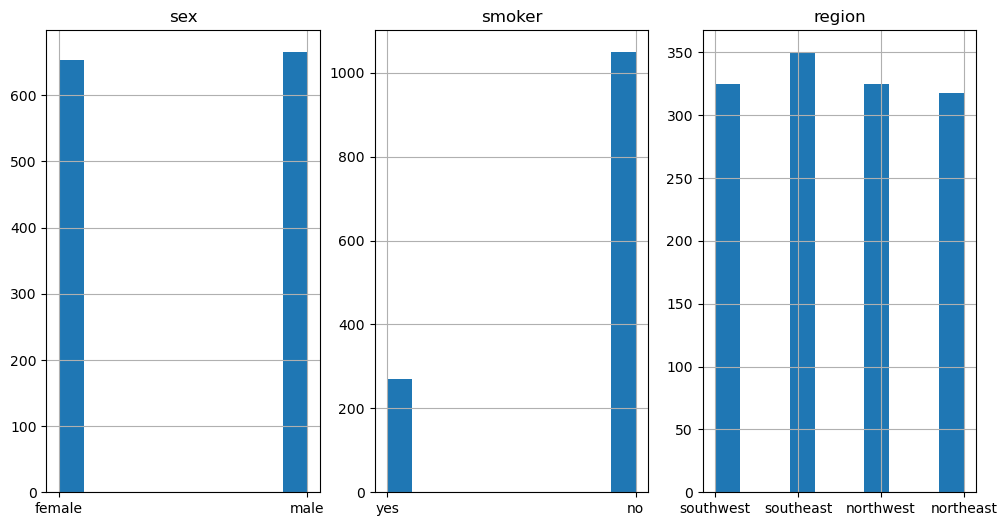

In [208]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
axes_flat = axes.flatten()

for i, col in enumerate(df.select_dtypes('category')):
        ax = axes_flat[i]
        ax.hist(df[col])
        ax.set_title(col)

In [210]:
df.children.value_counts()

0.0    648
1.0    287
2.0    208
3.0    137
4.0     22
5.0     16
Name: children, dtype: int64

### Bivariate analysis

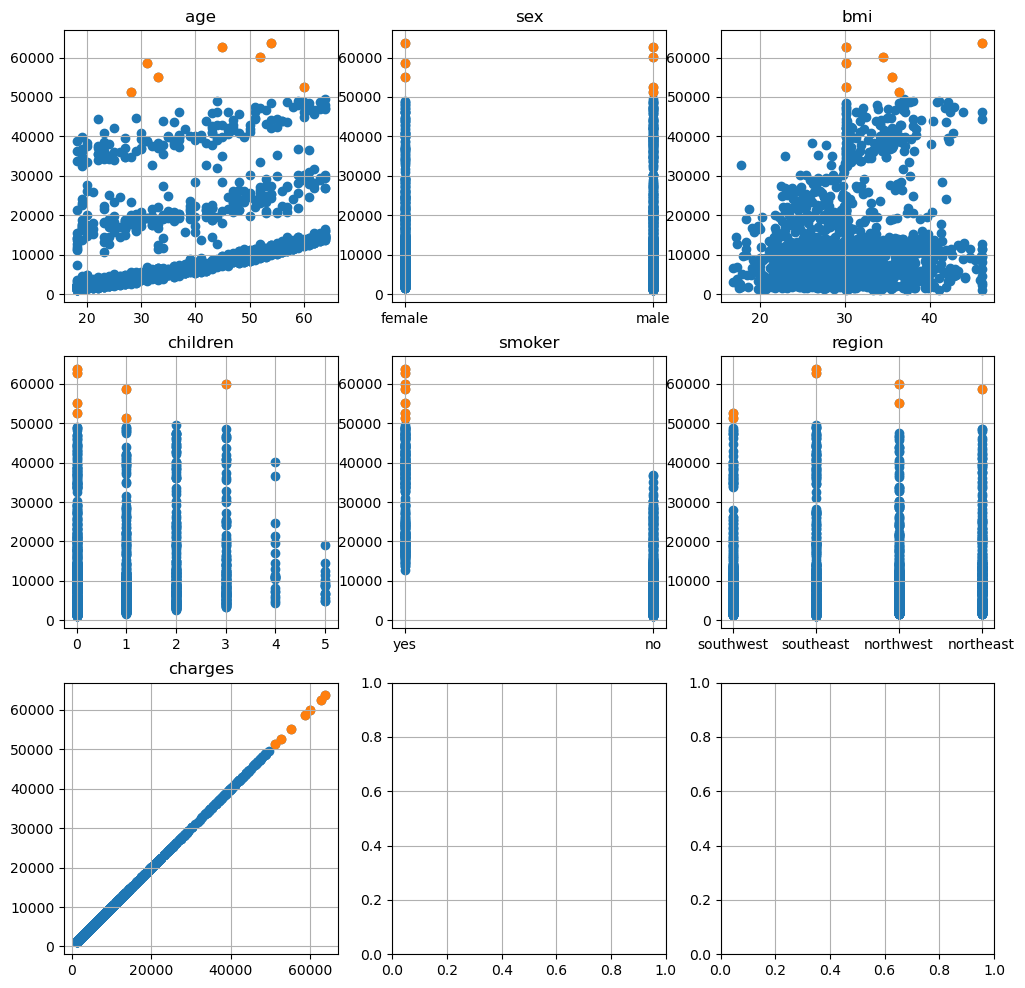

In [215]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes_flat = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes_flat[i]
    ax.scatter(df[col], df.charges)
    flags = df.charges >= 50000
    ax.scatter(df[col][flags], df.charges[flags])
    ax.set_title(col)


#### * handling outliers

In [220]:
df.drop(df[flags].index, inplace=True)

In [222]:
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
5,31.0,female,25.740,0.0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52.0,female,44.700,3.0,no,southwest,11411.68500
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


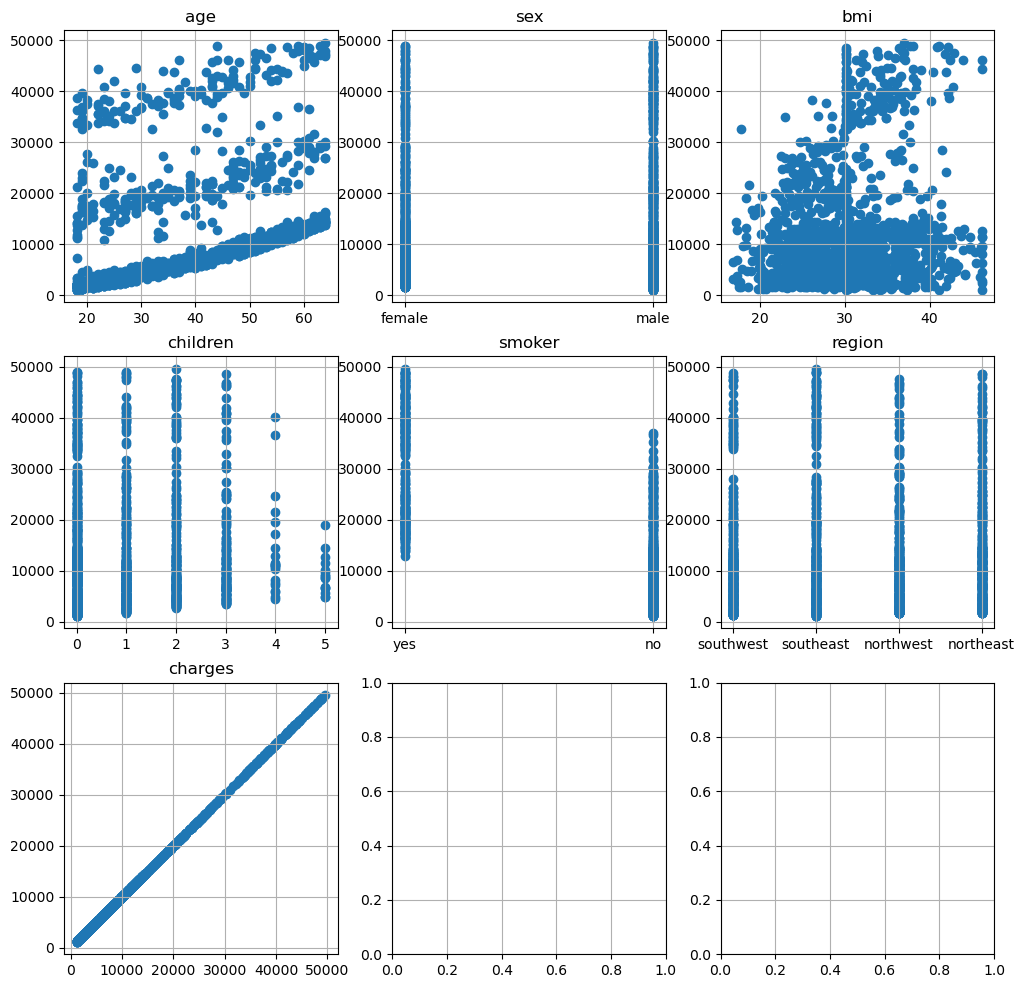

In [221]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes_flat = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes_flat[i]
    ax.scatter(df[col], df.charges)
    ax.set_title(col)

## **🔸 Data Normalization**

### Normalization

In [254]:
def normalization(x):
    return (x - x.min()) / (x.max() - x.min())

In [258]:
dfe = dfe.apply(normalization)
dfe.min(), dfe.max()

(age                 0.0
 bmi                 0.0
 children            0.0
 sex_male            0.0
 smoker_yes          0.0
 region_northeast    0.0
 region_northwest    0.0
 region_southeast    0.0
 region_southwest    0.0
 charges             0.0
 dtype: float64,
 age                 1.0
 bmi                 1.0
 children            1.0
 sex_male            1.0
 smoker_yes          1.0
 region_northeast    1.0
 region_northwest    1.0
 region_southeast    1.0
 region_southwest    1.0
 charges             1.0
 dtype: float64)

In [259]:
df.min()

C:\Users\PC\AppData\Local\Temp\ipykernel_3636\3962516015.py:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.min()


age           18.0000
bmi           16.8150
children       0.0000
charges     1131.5066
dtype: float64

In [263]:
normz = MinMaxScaler()
normz.fit_transform(dfe)

array([[0.02173913, 0.30524577, 0.        , ..., 0.        , 1.        ,
        0.25149567],
       [0.2173913 , 0.4456836 , 0.6       , ..., 1.        , 0.        ,
        0.05296955],
       [0.32608696, 0.16219193, 0.        , ..., 0.        , 0.        ,
        0.33290746],
       ...,
       [0.        , 0.41594382, 0.        , ..., 0.        , 0.        ,
        0.01715346],
       [0.06521739, 0.24741842, 0.        , ..., 0.        , 1.        ,
        0.01399191],
       [0.93478261, 0.33746386, 0.        , ..., 0.        , 0.        ,
        0.44716373]])

### Standardization

In [264]:
def standardization(x):
    return (x - x.mean()) / x.std()

In [267]:
dfe[['age', 'bmi', 'children', 'charges']] = dfe[['age', 'bmi', 'children', 'charges']].apply(standardization)
dfe

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,-1.475918,-0.454105,-0.819139,0.0,1.0,0.0,0.0,0.0,1.0,0.293350
2,-0.828864,0.406955,1.707285,1.0,0.0,0.0,0.0,1.0,0.0,-0.734518
3,-0.469390,-1.331205,-0.819139,1.0,0.0,0.0,1.0,0.0,0.0,0.714859
4,-0.541284,-0.288646,-0.819139,1.0,0.0,0.0,1.0,0.0,0.0,-0.782674
5,-0.613179,-0.818790,-0.819139,0.0,0.0,0.0,0.0,1.0,0.0,-0.791786
...,...,...,...,...,...,...,...,...,...,...
1332,0.896613,2.382330,1.707285,0.0,0.0,0.0,0.0,0.0,1.0,-0.159047
1333,0.752823,0.064220,1.707285,1.0,0.0,0.0,1.0,0.0,0.0,-0.226093
1334,-1.547813,0.224613,-0.819139,0.0,0.0,1.0,0.0,0.0,0.0,-0.919956
1336,-1.332128,-0.808659,-0.819139,0.0,0.0,0.0,0.0,0.0,1.0,-0.936325


In [268]:
standard = StandardScaler()
standard.fit_transform(dfe)

array([[-1.47647804, -0.45427747, -0.81944992, ..., -0.60130712,
         1.74796585,  0.29346147],
       [-0.82917855,  0.40710991,  1.70793306, ...,  1.66304368,
        -0.57209356, -0.73479679],
       [-0.46956771, -1.3317103 , -0.81944992, ..., -0.60130712,
        -0.57209356,  0.71513063],
       ...,
       [-1.54840021,  0.22469847, -0.81944992, ..., -0.60130712,
        -0.57209356, -0.92030482],
       [-1.33263371, -0.80896639, -0.81944992, ..., -0.60130712,
         1.74796585, -0.93667992],
       [ 1.54425295, -0.25666507, -0.81944992, ..., -0.60130712,
        -0.57209356,  1.30691652]])

In [272]:
dataset = dfe.values
dataset

array([[-1.47591782, -0.4541051 , -0.81913899, ...,  0.        ,
         1.        ,  0.29335012],
       [-0.82886393,  0.40695544,  1.70728501, ...,  1.        ,
         0.        , -0.73451798],
       [-0.46938954, -1.331205  , -0.81913899, ...,  0.        ,
         0.        ,  0.71485929],
       ...,
       [-1.54781269,  0.22461321, -0.81913899, ...,  0.        ,
         0.        , -0.91995562],
       [-1.33212806, -0.80865944, -0.81913899, ...,  0.        ,
         1.        , -0.93632451],
       [ 1.54366701, -0.25656768, -0.81913899, ...,  0.        ,
         0.        ,  1.30642063]])

## **🔸 Data/Feature Reduction**

### Data Reduction

In [282]:
idx = np.random.permutation(dfe.shape[0])[:1000]
idx.shape

(1000,)

In [283]:
dfe.iloc[idx]

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
580,1.399877,-0.866063,0.023002,1.0,0.0,1.0,0.0,0.0,0.0,-0.034872
752,1.759352,1.235093,-0.819139,1.0,0.0,0.0,1.0,0.0,0.0,0.072295
13,1.184193,1.558413,-0.819139,0.0,0.0,0.0,0.0,1.0,0.0,-0.185577
964,0.896613,1.042621,0.865144,1.0,0.0,0.0,1.0,0.0,0.0,1.085376
965,-0.325600,-0.589173,0.023002,1.0,0.0,0.0,0.0,0.0,1.0,-0.709979
...,...,...,...,...,...,...,...,...,...,...
1203,0.824718,0.288771,0.023002,1.0,0.0,1.0,0.0,0.0,0.0,-0.278702
820,0.393349,0.525140,0.023002,1.0,0.0,0.0,0.0,0.0,1.0,-0.486842
422,0.033875,0.368967,0.023002,1.0,1.0,1.0,0.0,0.0,0.0,2.131658
413,-1.044549,-1.129447,-0.819139,1.0,0.0,0.0,0.0,0.0,1.0,-0.682392


### Feature Selection

In [285]:
dfe.corr()

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
age,1.000000,0.125517,0.051261,-0.019283,-0.023052,0.005718,-0.013657,0.010739,-0.003022,0.298536
bmi,0.125517,1.000000,0.007090,0.045233,-0.010906,-0.120484,-0.139734,0.265563,-0.012764,0.158379
children,0.051261,0.007090,1.000000,0.019386,0.005309,-0.004951,0.022062,-0.022347,0.005750,0.066010
sex_male,-0.019283,0.045233,0.019386,1.000000,0.076340,-0.005134,-0.010490,0.018578,-0.003449,0.057362
smoker_yes,-0.023052,-0.010906,0.005309,0.076340,1.000000,0.000427,-0.036388,0.070615,-0.036388,0.786695
region_northeast,0.005718,-0.120484,-0.004951,-0.005134,0.000427,1.000000,-0.322612,-0.339086,-0.322612,0.004355
region_northwest,-0.013657,-0.139734,0.022062,-0.010490,-0.036388,-0.322612,1.000000,-0.344004,-0.327291,-0.043441
region_southeast,0.010739,0.265563,-0.022347,0.018578,0.070615,-0.339086,-0.344004,1.000000,-0.344004,0.083837
region_southwest,-0.003022,-0.012764,0.005750,-0.003449,-0.036388,-0.322612,-0.327291,-0.344004,1.000000,-0.046782
charges,0.298536,0.158379,0.066010,0.057362,0.786695,0.004355,-0.043441,0.083837,-0.046782,1.000000


In [290]:
dfe.drop(['sex_male', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'children'], axis=1, inplace=True)

In [291]:
dfe

,age,bmi,smoker_yes,charges
0,-1.475918,-0.454105,1.0,0.293350
2,-0.828864,0.406955,0.0,-0.734518
3,-0.469390,-1.331205,0.0,0.714859
4,-0.541284,-0.288646,0.0,-0.782674
5,-0.613179,-0.818790,0.0,-0.791786
...,...,...,...,...
1332,0.896613,2.382330,0.0,-0.159047
1333,0.752823,0.064220,0.0,-0.226093
1334,-1.547813,0.224613,0.0,-0.919956
1336,-1.332128,-0.808659,0.0,-0.936325
